In [2]:
pip install pvlib

Note: you may need to restart the kernel to use updated packages.


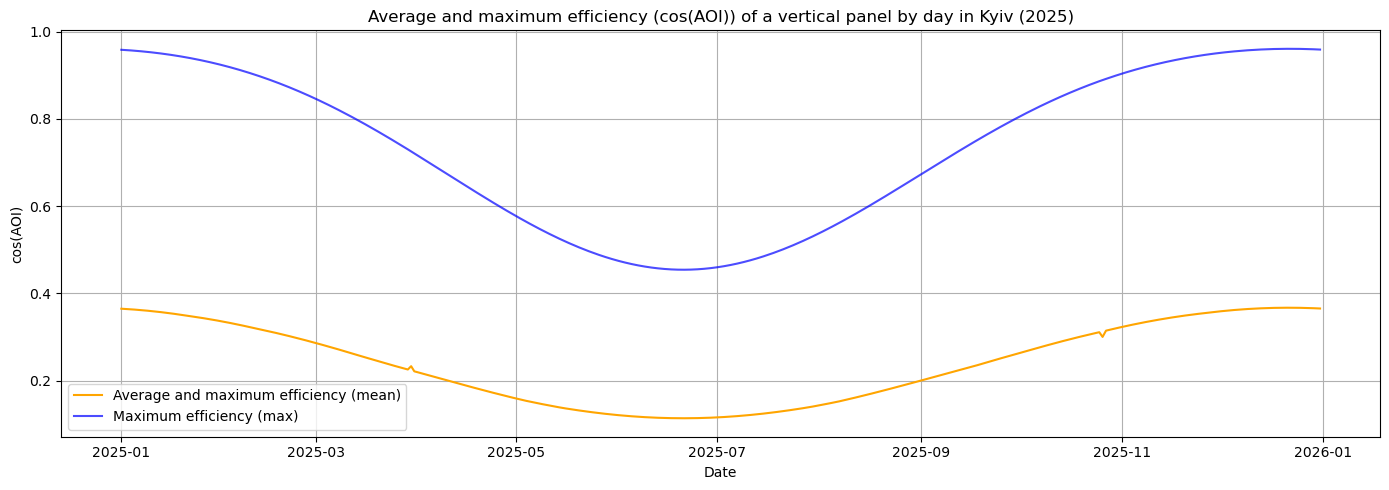

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pvlib.location import Location
import pvlib

# Створюємо часовий ряд на весь 2025 рік (по годинах)
times = pd.date_range('2025-01-01', '2025-12-31 23:00', freq='1h', tz='Europe/Kyiv')

# Локація — Київ
location = Location(latitude=50.45, longitude=30.52, tz='Europe/Kyiv')

# Положення Сонця
solar_position = location.get_solarposition(times)

# Кут падіння (AOI) на вертикальну південну панель
aoi = pvlib.irradiance.aoi(
    surface_tilt=90,
    surface_azimuth=180,
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth']
)

# cos(AOI) — відносна ефективність; усе < 0 обнуляємо
efficiency = np.cos(np.radians(aoi))
efficiency[efficiency < 0] = 0

# У DataFrame
df = pd.DataFrame({'efficiency': efficiency}, index=times)

# Середнє та максимальне значення за день
daily_mean = df.resample('D').mean()
daily_max = df.resample('D').max()

# Побудова графіка
plt.figure(figsize=(14, 5))
plt.plot(daily_mean.index, daily_mean['efficiency'], label='Average and maximum efficiency (mean)', color='orange')
plt.plot(daily_max.index, daily_max['efficiency'], label='Maximum efficiency (max)', color='blue', alpha=0.7)
plt.title('Average and maximum efficiency (cos(AOI)) of a vertical panel in Kyiv daily (2025)')
plt.xlabel('Date')
plt.ylabel('cos(AOI)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
